In [1]:
import requests
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import time
import datetime

In [2]:
spotipy_client_id = 'CLIENT_ID'
spotipy_client_secret = 'CLIENT_SECRET'
spotipy_redirect_uri = 'URI'
scope = 'user-top-read'

In [3]:
sp = spotipy.Spotify(auth_manager = SpotifyOAuth(client_id = spotipy_client_id, 
                                                client_secret = spotipy_client_secret, 
                                                redirect_uri = spotipy_redirect_uri,
                                                scope = scope))

In [4]:
top_tracks_short = sp.current_user_top_tracks(limit=10, offset=0, time_range = 'short_term')

In [5]:
top_tracks_short

{'items': [{'album': {'album_type': 'SINGLE',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7blXVKBSxdFZsIqlhdViKc'},
      'href': 'https://api.spotify.com/v1/artists/7blXVKBSxdFZsIqlhdViKc',
      'id': '7blXVKBSxdFZsIqlhdViKc',
      'name': 'Valley',
      'type': 'artist',
      'uri': 'spotify:artist:7blXVKBSxdFZsIqlhdViKc'}],
    'available_markets': ['AD',
     'AE',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BH',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IL',
     'IN',
     'IS',
     'IT',
     'JO',
     'JP',
     'KW',
     'LB',
     'LI',
     'LT',
     'LU',
     'LV',
     'MA',
     'MC',
     'MT',
     'MX',
     'MY',
     'NI',
     'NL',
     'NO',
     '

In [6]:
top_tracks_short = sp.current_user_top_tracks(limit=20, offset=0, time_range = 'short_term')

In [7]:
type(top_tracks_short)

dict

In [8]:
#start with empty track_ids list
#for song in dictionary, first go to key 'items'
#then get id for that song
#append to track_ids
def get_track_ids(time_frame):
    track_ids=[]
    for song in time_frame['items']:
        track_ids.append(song['id'])
    return track_ids

In [9]:
track_ids = get_track_ids(top_tracks_short)

In [10]:
track_ids

['697MdxMbVWn1Ajbw8iaPv5',
 '7q0ez7c8f92Rwpl6nVw5M6',
 '6YG2PNDqV4qfKcKRhyMPKU',
 '491W4t6qtEvd1MupR9r3Zm',
 '1mEM6KkVMwpuAuqusCMD6m',
 '3YCUPKddcFr4s6iL4mj6Xy',
 '4Zwt0IkpzDOW2u0YfV94TK',
 '4pNApnaUWAL2J4KO2eqokq',
 '4rEAtHXza0kdANkTLUwXM1',
 '5VgUkdoUGNGdUQQGAJieZe',
 '7A2cNLRT0YJc1yjxHlKihs',
 '4BIuY0oEopXizyP3WvkNrT',
 '5JMLYOvdtPdSRwJbAPszTr',
 '6cVnHJlv4wVKF7MOTOcHZ6',
 '5mblHLGgEz6O8WNsv5Z406',
 '6nfqlFOMiWthaOEa53uU0v',
 '7rpNuuoMbid56XkDsx2FjE',
 '1H2HqAQw4sDHQiZQDvsAYd',
 '0z88v5OzBLTyqtoicF2rtH',
 '25gacl0dFF9HTclx7Ug7xC']

In [11]:
#pick a song
track_id = '697MdxMbVWn1Ajbw8iaPv5'

In [12]:
meta = sp.track(track_id)
meta

{'album': {'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7blXVKBSxdFZsIqlhdViKc'},
    'href': 'https://api.spotify.com/v1/artists/7blXVKBSxdFZsIqlhdViKc',
    'id': '7blXVKBSxdFZsIqlhdViKc',
    'name': 'Valley',
    'type': 'artist',
    'uri': 'spotify:artist:7blXVKBSxdFZsIqlhdViKc'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR',
   'HT',
   '

In [40]:
#create a function to get track features
def get_track_features(id):
    meta=sp.track(id)
    #meta
    track_id= meta['id']
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    spotify_url = meta['external_urls']['spotify']
    album_cover = meta['album']['images'][0]['url']
    track_info= [track_id, name, album, artist, spotify_url, album_cover]
    return track_info

In [41]:
get_track_features(track_id)

['697MdxMbVWn1Ajbw8iaPv5',
 'Last Birthday',
 'The After Party',
 'Valley',
 'https://open.spotify.com/track/697MdxMbVWn1Ajbw8iaPv5',
 'https://i.scdn.co/image/ab67616d0000b273634e1fb57aea679660033b25']

In [42]:
#loop over track ids to get df of all tracks
#time.sleep(.5) means sleep in between each track
tracks = []
for i in range (len(track_ids)):
    time.sleep(.5)
    track= get_track_features(track_ids[i])
    tracks.append(track)

In [43]:
tracks

[['697MdxMbVWn1Ajbw8iaPv5',
  'Last Birthday',
  'The After Party',
  'Valley',
  'https://open.spotify.com/track/697MdxMbVWn1Ajbw8iaPv5',
  'https://i.scdn.co/image/ab67616d0000b273634e1fb57aea679660033b25'],
 ['7q0ez7c8f92Rwpl6nVw5M6',
  '7 Stories',
  'The After Party',
  'Valley',
  'https://open.spotify.com/track/7q0ez7c8f92Rwpl6nVw5M6',
  'https://i.scdn.co/image/ab67616d0000b273634e1fb57aea679660033b25'],
 ['6YG2PNDqV4qfKcKRhyMPKU',
  'Lose My Number',
  'Lose My Number',
  'Nightly',
  'https://open.spotify.com/track/6YG2PNDqV4qfKcKRhyMPKU',
  'https://i.scdn.co/image/ab67616d0000b273f3fa268c33fa25670adf4e78'],
 ['491W4t6qtEvd1MupR9r3Zm',
  'Paper Cup (sorry for myself)',
  'The After Party',
  'Valley',
  'https://open.spotify.com/track/491W4t6qtEvd1MupR9r3Zm',
  'https://i.scdn.co/image/ab67616d0000b273634e1fb57aea679660033b25'],
 ['1mEM6KkVMwpuAuqusCMD6m',
  'Crisis',
  'Crisis / Secret / Set Me Free',
  'Joshua Bassett',
  'https://open.spotify.com/track/1mEM6KkVMwpuAuqusCM

In [45]:
#create Df
df= pd.DataFrame(tracks, columns = ['track_id','name', 'album', 'artist', 'spotify_url', 'album_cover'])
df.head()

,track_id,name,album,artist,spotify_url,album_cover
0,697MdxMbVWn1Ajbw8iaPv5,Last Birthday,The After Party,Valley,https://open.spotify.com/track/697MdxMbVWn1Ajb...,https://i.scdn.co/image/ab67616d0000b273634e1f...
1,7q0ez7c8f92Rwpl6nVw5M6,7 Stories,The After Party,Valley,https://open.spotify.com/track/7q0ez7c8f92Rwpl...,https://i.scdn.co/image/ab67616d0000b273634e1f...
2,6YG2PNDqV4qfKcKRhyMPKU,Lose My Number,Lose My Number,Nightly,https://open.spotify.com/track/6YG2PNDqV4qfKcK...,https://i.scdn.co/image/ab67616d0000b273f3fa26...
3,491W4t6qtEvd1MupR9r3Zm,Paper Cup (sorry for myself),The After Party,Valley,https://open.spotify.com/track/491W4t6qtEvd1Mu...,https://i.scdn.co/image/ab67616d0000b273634e1f...
4,1mEM6KkVMwpuAuqusCMD6m,Crisis,Crisis / Secret / Set Me Free,Joshua Bassett,https://open.spotify.com/track/1mEM6KkVMwpuAuq...,https://i.scdn.co/image/ab67616d0000b273aaccdc...


In [18]:
audio_features = sp.audio_features('697MdxMbVWn1Ajbw8iaPv5')

In [29]:
audio_features

[{'danceability': 0.706,
  'energy': 0.644,
  'key': 8,
  'loudness': -7.772,
  'mode': 1,
  'speechiness': 0.0318,
  'acousticness': 0.14,
  'instrumentalness': 0,
  'liveness': 0.154,
  'valence': 0.603,
  'tempo': 120.002,
  'type': 'audio_features',
  'id': '697MdxMbVWn1Ajbw8iaPv5',
  'uri': 'spotify:track:697MdxMbVWn1Ajbw8iaPv5',
  'track_href': 'https://api.spotify.com/v1/tracks/697MdxMbVWn1Ajbw8iaPv5',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/697MdxMbVWn1Ajbw8iaPv5',
  'duration_ms': 237231,
  'time_signature': 4}]

In [33]:
#create a function to get track features
def get_audio_features(id):
    meta_audio=sp.audio_features(id)
    #meta
    for track in meta_audio: 
        track_id = meta_audio[0].get('id')
        danceability = meta_audio[0].get('danceability')
        energy = meta_audio[0].get('energy')
        valence = meta_audio[0].get('valence')
        tempo = meta_audio[0].get('tempo')
        track_audio_info= [track_id, danceability, energy, valence, tempo]
    return track_audio_info

In [34]:
#danceability, energy, valence, tempo for track with id '697MdxMbVWn1Ajbw8iaPv5'
get_audio_features(track_id)

['697MdxMbVWn1Ajbw8iaPv5', 0.706, 0.644, 0.603, 120.002]

In [35]:
#loop over tracks to get info for all albums
tracks_features = []
for i in range (len(track_ids)):
    time.sleep(.5)
    track= get_audio_features(track_ids[i])
    tracks_features.append(track)

In [36]:
tracks_features

[['697MdxMbVWn1Ajbw8iaPv5', 0.706, 0.644, 0.603, 120.002],
 ['7q0ez7c8f92Rwpl6nVw5M6', 0.293, 0.284, 0.122, 78.762],
 ['6YG2PNDqV4qfKcKRhyMPKU', 0.783, 0.705, 0.671, 94.986],
 ['491W4t6qtEvd1MupR9r3Zm', 0.456, 0.484, 0.455, 145.163],
 ['1mEM6KkVMwpuAuqusCMD6m', 0.593, 0.514, 0.461, 133.68],
 ['3YCUPKddcFr4s6iL4mj6Xy', 0.409, 0.948, 0.839, 171.132],
 ['4Zwt0IkpzDOW2u0YfV94TK', 0.416, 0.45, 0.287, 97.676],
 ['4pNApnaUWAL2J4KO2eqokq', 0.46, 0.632, 0.399, 79.846],
 ['4rEAtHXza0kdANkTLUwXM1', 0.641, 0.883, 0.83, 109.977],
 ['5VgUkdoUGNGdUQQGAJieZe', 0.647, 0.636, 0.441, 130.022],
 ['7A2cNLRT0YJc1yjxHlKihs', 0.628, 0.685, 0.605, 126.014],
 ['4BIuY0oEopXizyP3WvkNrT', 0.697, 0.515, 0.37, 95.086],
 ['5JMLYOvdtPdSRwJbAPszTr', 0.701, 0.754, 0.576, 104.98],
 ['6cVnHJlv4wVKF7MOTOcHZ6', 0.432, 0.49, 0.722, 203.364],
 ['5mblHLGgEz6O8WNsv5Z406', 0.516, 0.831, 0.551, 129.97],
 ['6nfqlFOMiWthaOEa53uU0v', 0.606, 0.9, 0.233, 133.963],
 ['7rpNuuoMbid56XkDsx2FjE', 0.443, 0.582, 0.239, 147.589],
 ['1H2HqAQw4

In [47]:
#create audio features Df
df2= pd.DataFrame(tracks_features, columns = ['track_id', 'danceability', 'energy', 'valence', 'tempo'])
df2.head()

,track_id,danceability,energy,valence,tempo
0,697MdxMbVWn1Ajbw8iaPv5,0.706,0.644,0.603,120.002
1,7q0ez7c8f92Rwpl6nVw5M6,0.293,0.284,0.122,78.762
2,6YG2PNDqV4qfKcKRhyMPKU,0.783,0.705,0.671,94.986
3,491W4t6qtEvd1MupR9r3Zm,0.456,0.484,0.455,145.163
4,1mEM6KkVMwpuAuqusCMD6m,0.593,0.514,0.461,133.680


In [48]:
track_info = df.merge(df2, how='left', on = 'track_id')

In [49]:
track_info

,track_id,name,album,artist,spotify_url,album_cover,danceability,energy,valence,tempo
0,697MdxMbVWn1Ajbw8iaPv5,Last Birthday,The After Party,Valley,https://open.spotify.com/track/697MdxMbVWn1Ajb...,https://i.scdn.co/image/ab67616d0000b273634e1f...,0.706,0.644,0.603,120.002
1,7q0ez7c8f92Rwpl6nVw5M6,7 Stories,The After Party,Valley,https://open.spotify.com/track/7q0ez7c8f92Rwpl...,https://i.scdn.co/image/ab67616d0000b273634e1f...,0.293,0.284,0.122,78.762
2,6YG2PNDqV4qfKcKRhyMPKU,Lose My Number,Lose My Number,Nightly,https://open.spotify.com/track/6YG2PNDqV4qfKcK...,https://i.scdn.co/image/ab67616d0000b273f3fa26...,0.783,0.705,0.671,94.986
3,491W4t6qtEvd1MupR9r3Zm,Paper Cup (sorry for myself),The After Party,Valley,https://open.spotify.com/track/491W4t6qtEvd1Mu...,https://i.scdn.co/image/ab67616d0000b273634e1f...,0.456,0.484,0.455,145.163
4,1mEM6KkVMwpuAuqusCMD6m,Crisis,Crisis / Secret / Set Me Free,Joshua Bassett,https://open.spotify.com/track/1mEM6KkVMwpuAuq...,https://i.scdn.co/image/ab67616d0000b273aaccdc...,0.593,0.514,0.461,133.680
5,3YCUPKddcFr4s6iL4mj6Xy,Meet Me on the Roof,Father of All...,Green Day,https://open.spotify.com/track/3YCUPKddcFr4s6i...,https://i.scdn.co/image/ab67616d0000b273e334a0...,0.409,0.948,0.839,171.132
6,4Zwt0IkpzDOW2u0YfV94TK,Still,Heartbreak Weather,Niall Horan,https://open.spotify.com/track/4Zwt0IkpzDOW2u0...,https://i.scdn.co/image/ab67616d0000b2733d13e9...,0.416,0.450,0.287,97.676
7,4pNApnaUWAL2J4KO2eqokq,Come Back...Be Here (Taylor's Version),Red (Taylor's Version),Taylor Swift,https://open.spotify.com/track/4pNApnaUWAL2J4K...,https://i.scdn.co/image/ab67616d0000b273318443...,0.460,0.632,0.399,79.846
8,4rEAtHXza0kdANkTLUwXM1,the movies (feat. Charli Adams),the movies (feat. Charli Adams),Nightly,https://open.spotify.com/track/4rEAtHXza0kdANk...,https://i.scdn.co/image/ab67616d0000b273928e44...,0.641,0.883,0.830,109.977
9,5VgUkdoUGNGdUQQGAJieZe,Sticks and Stones (feat. Charlotte Sands),Mind Games,JORDY,https://open.spotify.com/track/5VgUkdoUGNGdUQQ...,https://i.scdn.co/image/ab67616d0000b2732b5610...,0.647,0.636,0.441,130.022


In [52]:
track_info_condensed = track_info[['name', 'album','artist', 'danceability', 'energy', 'valence','tempo']]

In [53]:
track_info_condensed

,name,album,artist,danceability,energy,valence,tempo
0,Last Birthday,The After Party,Valley,0.706,0.644,0.603,120.002
1,7 Stories,The After Party,Valley,0.293,0.284,0.122,78.762
2,Lose My Number,Lose My Number,Nightly,0.783,0.705,0.671,94.986
3,Paper Cup (sorry for myself),The After Party,Valley,0.456,0.484,0.455,145.163
4,Crisis,Crisis / Secret / Set Me Free,Joshua Bassett,0.593,0.514,0.461,133.680
5,Meet Me on the Roof,Father of All...,Green Day,0.409,0.948,0.839,171.132
6,Still,Heartbreak Weather,Niall Horan,0.416,0.450,0.287,97.676
7,Come Back...Be Here (Taylor's Version),Red (Taylor's Version),Taylor Swift,0.460,0.632,0.399,79.846
8,the movies (feat. Charli Adams),the movies (feat. Charli Adams),Nightly,0.641,0.883,0.830,109.977
9,Sticks and Stones (feat. Charlotte Sands),Mind Games,JORDY,0.647,0.636,0.441,130.022


In [62]:
import matplotlib.pyplot as plt


In [64]:
%matplotlib inline

<BarContainer object of 20 artists>

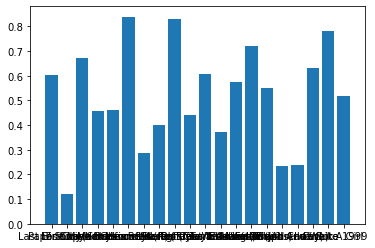

In [66]:
fig1 = plt.bar(track_info_condensed.name, track_info_condensed.valence)
fig1